In [6]:
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    %matplotlib inline
    from sklearn.linear_model import LinearRegression
    from scipy import stats
    
    cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
            'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
    
    data = pd.read_csv(r"C:\PythonScripts\course-files2\housing.data",
                       sep=' +', engine='python', header=None, names=cols)
    data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
data1=data[['LSTAT','MEDV']].copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   506 non-null    float64
 1   MEDV    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


C:\Users\Lila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

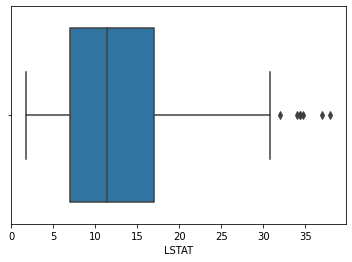

In [12]:
plt.figure()
sns.boxplot(data1['LSTAT'])
plt.plot()

In [15]:
X=data1['LSTAT'].values.reshape(-1,1)
y=data1['MEDV'].values
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [16]:
lr1=LinearRegression()
lr1.fit(X, y)
lr1.score(X, y)

0.5441462975864799

In [19]:
z=np.abs(stats.zscore(data1))
treshold=3
data1_o_z=data1[(z<treshold).all(axis=1)]
data1_o_z

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


C:\Users\Lila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

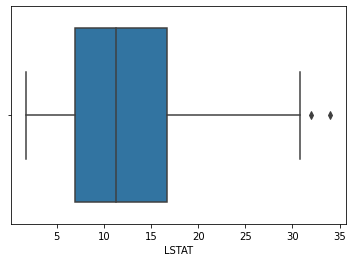

In [20]:
plt.figure()
sns.boxplot(data1_o_z['LSTAT'])
plt.plot()

In [21]:
X=data1_o_z['LSTAT'].values.reshape(-1,1)
y=data1_o_z['MEDV'].values
lr1_o_z=LinearRegression()
lr1_o_z.fit(X, y)
lr1_o_z.score(X, y)

0.561613442074578

In [22]:
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1

In [26]:
outlier_condition=((data1<(Q1-1.5*IQR)) | (data1>(Q3+1.5*IQR)))
data1_o_iqr=data1[~outlier_condition.any(axis=1)]
data1_o_iqr

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


C:\Users\Lila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

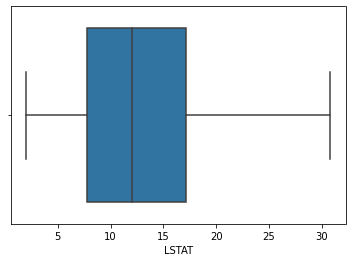

In [27]:
plt.figure()
sns.boxplot(data1_o_iqr['LSTAT'])
plt.plot()

In [28]:
X=data1_o_iqr['LSTAT'].values.reshape(-1,1)
y=data1_o_iqr['MEDV'].values

In [29]:
lr1_o_iqr=LinearRegression()
lr1_o_iqr.fit(X,y)
lr1_o_iqr.score(X,y)

0.6087730602029618